## Linear Regression Assignment

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
data = pd.read_csv('day.csv')

In [3]:
# Reading the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#We can see that there are no null values and all variables are either int or float except dteday.

In [6]:
#Dropping Variables
drop=['instant','dteday','atemp','casual','registered']
data.drop(drop,axis=1,inplace=True)
# instant is a record index and is not needed.
#dteday is not needed because other variables like year, month, etc explain it.
# atemp is similar to temp and therefore not needed.
# Casual and registered are from cnt.

In [7]:
#Categorical Variables conversion
data['weekday']=data['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
data['mnth']=data['mnth'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
data['weathersit']=data['weathersit'].map({1:'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
data['season']=data['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [8]:
# Changing the category variables datatype into category
data['season']=data['season'].astype('category')
data['yr'] = data['yr'].astype('category')
data['mnth']=data['mnth'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['weekday']=data['weekday'].astype('category')
data['workingday'] = data['workingday'].astype('category')
data['weathersit']=data['weathersit'].astype('category')

In [9]:
# Checking the dataset after changes.
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.4 KB


In [11]:
data.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
cnt           695
dtype: int64

In [12]:
data.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


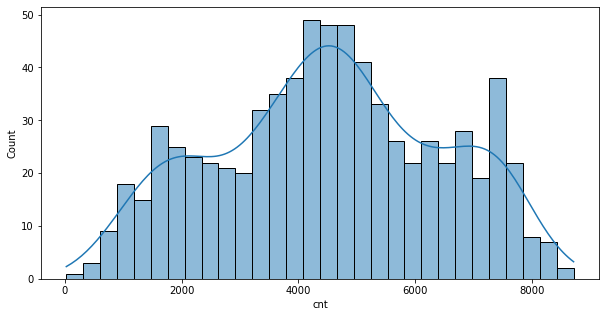

In [13]:
# Visualizing the target variable 'cnt'
plt.figure(figsize=(10,5))
sns.histplot(x='cnt', data=data, kde=True, bins=30)
plt.show()

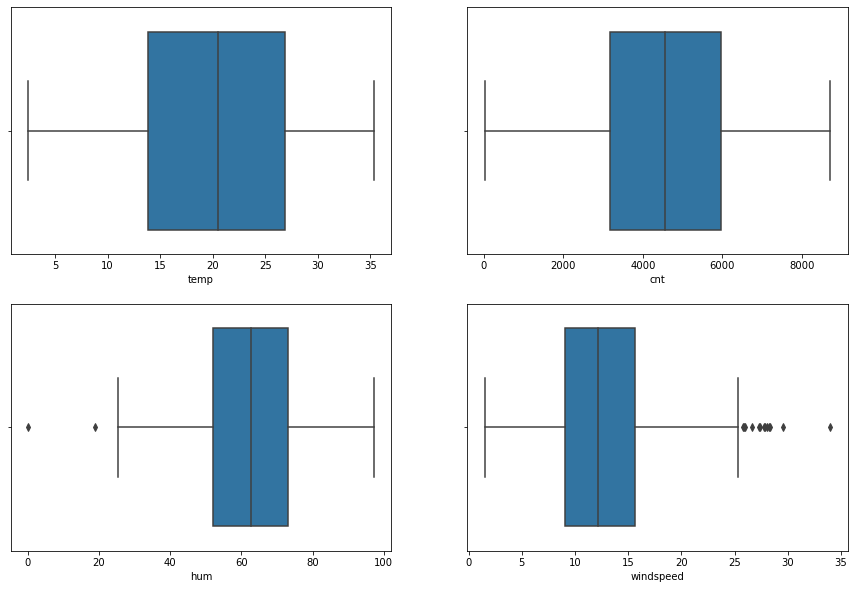

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.boxplot(data['temp'], ax=axes[0][0])
sns.boxplot(data['cnt'], ax=axes[0][1])
sns.boxplot(data['hum'], ax=axes[1][0])
sns.boxplot(data['windspeed'], ax=axes[1][1])
plt.show()

In [15]:
# We can see that there are no significant outliers in the data. In both hum and windspeed, they are close to actual data.

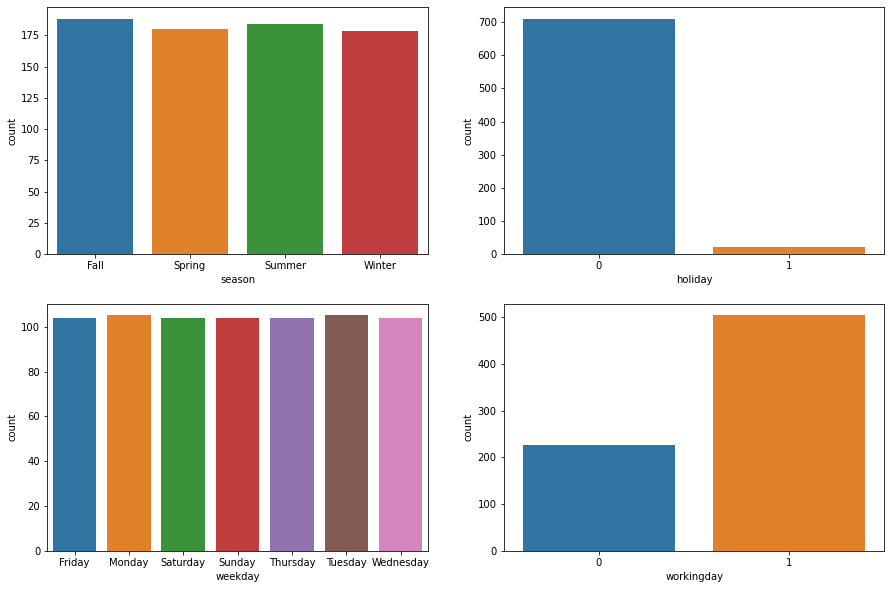

In [16]:
# Let's plot the bar plots for the categorical variables:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(data['season'], ax=axes[0][0])
sns.countplot(data['holiday'], ax=axes[0][1])
sns.countplot(data['weekday'], ax=axes[1][0])
sns.countplot(data['workingday'], ax=axes[1][1])
plt.show()

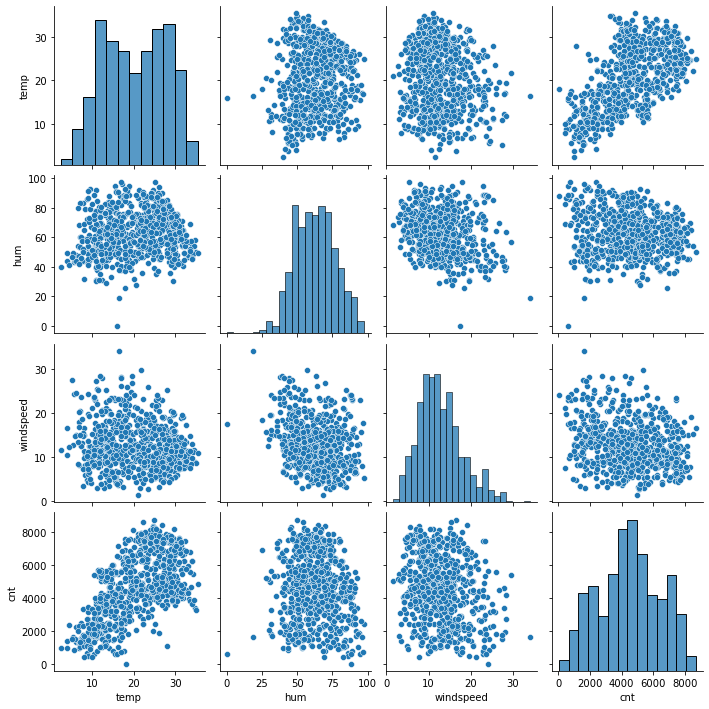

In [17]:
# Plotting the pairplot
sns.pairplot(data=data,vars=['temp','hum','windspeed','cnt'])
# We see that between temp and cnt, there is a high linear correlation.

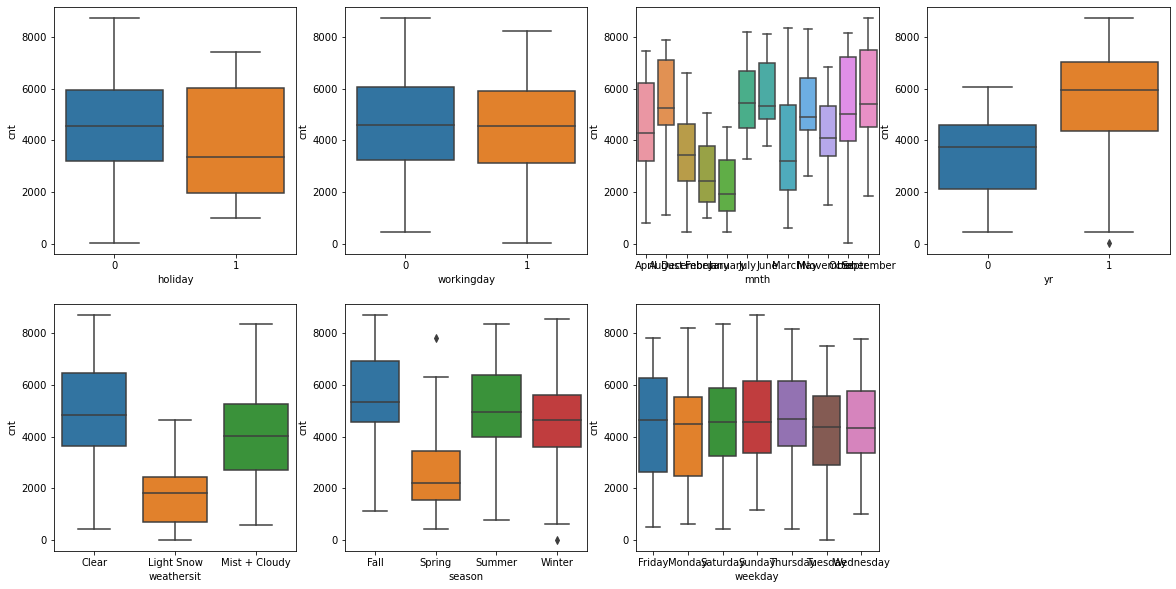

In [18]:
##  Categorical variables vs cnt column
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(data=data,x='holiday',y='cnt')
plt.subplot(2,4,2)
sns.boxplot(data=data,x='workingday',y='cnt')
plt.subplot(2,4,3)
sns.boxplot(data=data,x='mnth',y='cnt')
plt.subplot(2,4,4)
sns.boxplot(data=data,x='yr',y='cnt')
plt.subplot(2,4,5)
sns.boxplot(data=data,x='weathersit',y='cnt')
plt.subplot(2,4,6)
sns.boxplot(data=data,x='season',y='cnt')
plt.subplot(2,4,7)
sns.boxplot(data=data,x='weekday',y='cnt')
plt.show()

In [19]:
# We can see that many customers use the service during holidays as well.
# We can see that less customers use the service during the cold months(jan,feb).
# We can see that more customers use the service in 2019.
# We can see that more customers use the service during clear days.
# We can see that more customers use the service during fall and less in spring.

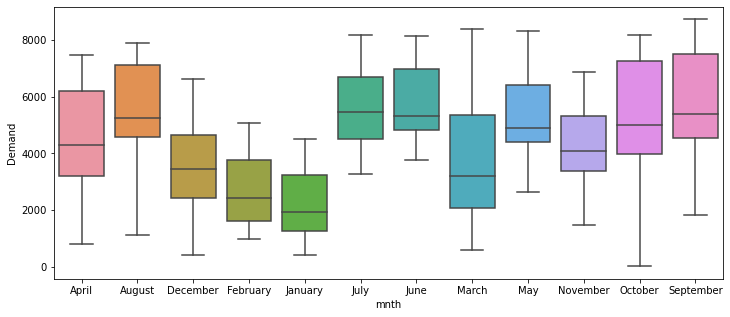

In [20]:
# making the boxplot for month clearly.
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x='mnth', y='cnt')
plt.xlabel('mnth')
plt.ylabel('Demand')
plt.show()

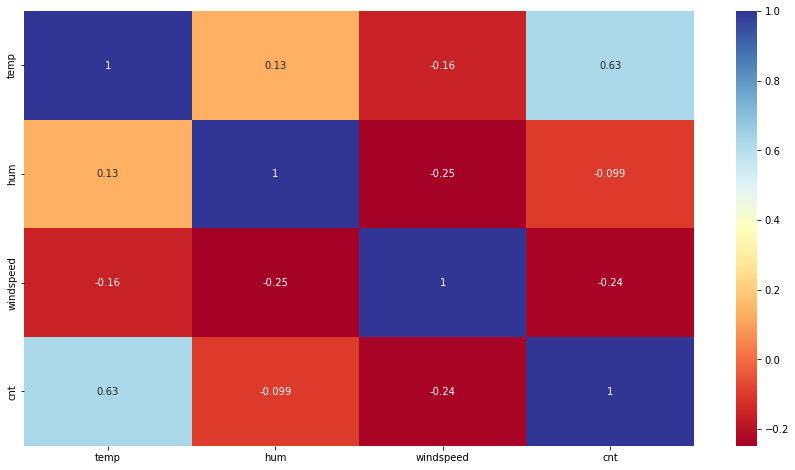

In [21]:
# Correlation between the varibales
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='RdYlBu',annot=True)
plt.show()
# We can see that temp is highly correlated with cnt.

In [22]:
# Creating Dummy variables for season,weathersit,weekday,mnth.
seasons=pd.get_dummies(data.season,drop_first=True)
weather=pd.get_dummies(data.weathersit,drop_first=True)
weekdays=pd.get_dummies(data.weekday,drop_first=True)
months=pd.get_dummies(data.mnth,drop_first=True)

In [23]:
seasons.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [24]:
# Adding the dummy varibales to the dataset
data=pd.concat([seasons,weather,weekdays,months,data],axis=1)

In [25]:
pd.set_option('display.max_columns',500)

In [26]:
data.head()

,Spring,Summer,Winter,Light Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Spring,0,January,0,Monday,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Spring,0,January,0,Tuesday,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [27]:
# Dropping 'mnth' ,'season' ,'weekday' ,'weathersit' as we have created their dummies 

data.drop(['mnth','season','weekday','weathersit'],axis=1,inplace=True)
data.head()

,Spring,Summer,Winter,Light Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [28]:
data.shape

(730, 29)

In [29]:
# Splitting Training and Test Sets
data_train,data_test=train_test_split(data,train_size=0.7,random_state=100)
data_train.shape

(510, 29)

In [30]:
# Min-Max Scaling
scaler=MinMaxScaler()

columns=['temp','hum','windspeed','cnt']

In [31]:
data_train[columns]=scaler.fit_transform(data_train[columns])

In [32]:
data_train.head()

,Spring,Summer,Winter,Light Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [33]:
data_train.describe()

,Spring,Summer,Winter,Light Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.029412,0.345098,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.537440,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.169124,0.475867,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


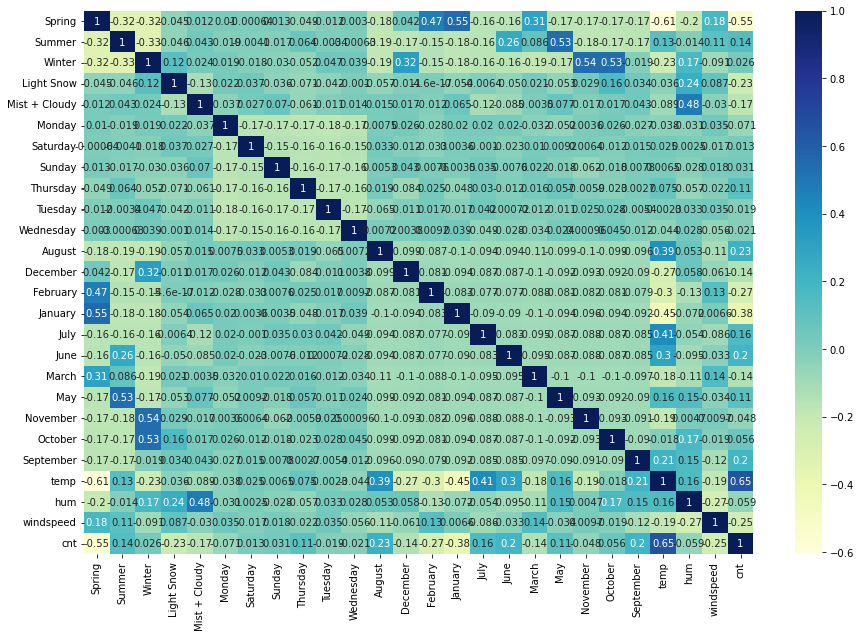

In [34]:
# Let's check the correlation coefficients again
plt.figure(figsize = (15, 10))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [35]:
# We see high correlation in many places.

In [36]:
# Dataset split into X and y
y_train=data_train.pop('cnt')
X_train=data_train

In [37]:
print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


In [38]:
# RFE with 15 variables and LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('August', False, 9),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('March', False, 14),
 ('May', False, 8),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [40]:
# RFE true columns
col_true=X_train.columns[rfe.support_]

col_true

Index(['Spring', 'Summer', 'Winter', 'Light Snow', 'Mist + Cloudy', 'December',
       'January', 'July', 'November', 'September', 'yr', 'holiday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [41]:
# RFE False columns
col_false=X_train.columns[~rfe.support_]

col_false

Index(['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'August', 'February', 'June', 'March', 'May', 'October', 'workingday'],
      dtype='object')

In [42]:
X_train_lm=X_train[col_true]

In [43]:
# Add Constant
X_train_lm=sm.add_constant(X_train_lm)

In [44]:
# Create a first fitted model
lr=sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          8.15e-189
Time:                        23:26:09   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

In [45]:
# VIF Calculation
X=X_train_lm
X=X.drop(['const'],axis=1)

vif=pd.DataFrame()

vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)

vif

,Features,VIF
13,hum,30.89
12,temp,17.79
14,windspeed,4.72
0,Spring,4.37
2,Winter,4.06
1,Summer,2.82
4,Mist + Cloudy,2.32
10,yr,2.09
8,November,1.85
6,January,1.75


In [46]:
# hum can be dropped as it has high VIF
X_train_1=X_train_lm.drop(['hum'],axis=1)

In [47]:
# Build a second fitted model
X_train_lm=sm.add_constant(X_train_1)
lr_2=sm.OLS(y_train,X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          4.75e-186
Time:                        23:26:29   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2450      0.032      7.618

In [48]:
X = X_train_1.drop('const',axis=1)

In [49]:
def Calculate_Vif(train):
    
    vif=pd.DataFrame()

    X=train
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending =False)

    return vif

In [50]:
# Calculate the VIFs again for the new model
Calculate_Vif(X)

,Features,VIF
12,temp,5.17
13,windspeed,4.67
2,Winter,2.95
0,Spring,2.89
1,Summer,2.24
10,yr,2.07
8,November,1.81
6,January,1.66
7,July,1.59
4,Mist + Cloudy,1.57


In [51]:
# Variable November can be dropped as it's P-value of 0.04 is not changing and the co-efficent is negative.
X=X.drop(['November'],axis=1)

In [52]:
# Build a third fitted model
X_train_lm=sm.add_constant(X)
lr_3=sm.OLS(y_train,X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          2.74e-186
Time:                        23:27:12   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2283      0.031      7.310

In [53]:
# Calculate the VIFs again for the new model
Calculate_Vif(X)

,Features,VIF
11,temp,5.14
12,windspeed,4.62
0,Spring,2.89
1,Summer,2.24
9,yr,2.07
2,Winter,2.05
6,January,1.65
7,July,1.59
4,Mist + Cloudy,1.57
8,September,1.34


In [54]:
# Drooping December variable due to high p-value
X=X.drop(['December'],axis=1)

In [55]:
# Build a fourth fitted model
X_train_lm=sm.add_constant(X)
lr_4=sm.OLS(y_train,X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          8.14e-187
Time:                        23:27:31   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088

In [56]:
# Calculate the VIFs again for the new model
Calculate_Vif(X)

,Features,VIF
10,temp,5.13
11,windspeed,4.62
0,Spring,2.75
1,Summer,2.24
8,yr,2.07
2,Winter,1.78
5,January,1.61
6,July,1.59
4,Mist + Cloudy,1.56
7,September,1.34


In [57]:
# Windspeed has negative correlation with cnt and high VIF, therefore droppin windspeed
X=X.drop(['windspeed'],axis=1)

In [58]:
# Build a fifth fitted model
X_train_lm=sm.add_constant(X)
lr_5=sm.OLS(y_train,X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          3.83e-180
Time:                        23:27:55   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1586      0.030      5.289

In [59]:
# Calculate the VIFs again for the new model
Calculate_Vif(X)

,Features,VIF
10,temp,4.28
8,yr,2.07
0,Spring,1.99
1,Summer,1.94
5,January,1.60
6,July,1.59
2,Winter,1.57
4,Mist + Cloudy,1.56
7,September,1.34
3,Light Snow,1.07


In [60]:
# Dropping January Variable due to high p-value

X=X.drop(['January'],axis=1)

In [61]:
# Build a sixth fitted model
X_train_lm=sm.add_constant(X)
lr_6=sm.OLS(y_train,X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          5.71e-181
Time:                        23:28:29   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1501      0.029      5.124

In [62]:
# Calculate the VIFs again for the new model
Calculate_Vif(X)

,Features,VIF
9,temp,4.22
7,yr,2.06
1,Summer,1.94
5,July,1.58
2,Winter,1.57
4,Mist + Cloudy,1.55
0,Spring,1.40
6,September,1.34
3,Light Snow,1.07
8,holiday,1.04


In [63]:
# We can see that VIF of all the variables is below 5 and p-values are also low i.e they are in acceptable ranges.

X_train_lm.head()

,const,Spring,Summer,Winter,Light Snow,Mist + Cloudy,July,September,yr,holiday,temp
576,1.0,0,0,0,0,0,1,0,1,0,0.815169
426,1.0,1,0,0,0,1,0,0,1,0,0.442393
728,1.0,1,0,0,0,0,0,0,1,0,0.245101
482,1.0,0,1,0,0,1,0,0,1,0,0.395666
111,1.0,0,1,0,0,1,0,0,0,0,0.345824


In [64]:
# y-train predicting
y_train_pred=lr_6.predict(X_train_lm)

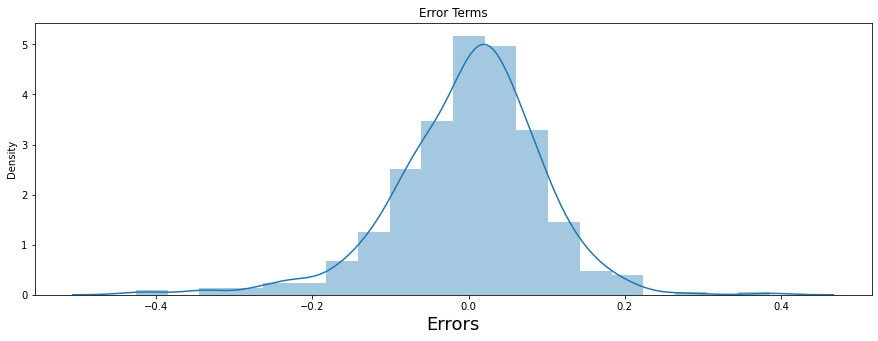

In [65]:
# Plot the histogram of the error terms
plt.figure(figsize=(15,5))
sns.distplot(y_train-y_train_pred,bins=20)
plt.title('Error Terms')
plt.xlabel('Errors',fontsize=18)
plt.show()

In [66]:
# Scale the test sets

columns = ['temp','hum','windspeed','cnt']

data_test[columns]=scaler.transform(data_test[columns])
data_test.head()

,Spring,Summer,Winter,Light Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.511964,0.837699,0.334206,0.303382
221,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [67]:
data_test.describe()

,Spring,Summer,Winter,Light Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.027273,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.558718,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.163248,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.558172,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [68]:
# divide into X_test and y_test

y_test=data_test.pop('cnt')
X_test=data_test

In [69]:
X_train_lm.columns

Index(['const', 'Spring', 'Summer', 'Winter', 'Light Snow', 'Mist + Cloudy',
       'July', 'September', 'yr', 'holiday', 'temp'],
      dtype='object')

In [70]:
# Creating X_test_1 dataframe by dropping variables from X_test
X_test_1=X_test[X_train_lm.columns.drop(['const'])]

In [71]:
X_test_1.head()

,Spring,Summer,Winter,Light Snow,Mist + Cloudy,July,September,yr,holiday,temp
184,0,0,0,0,1,1,0,0,1,0.831783
535,0,1,0,0,0,0,0,1,0,0.901354
299,0,0,1,0,1,0,0,0,0,0.511964
221,0,0,0,0,0,0,0,0,0,0.881625
152,0,1,0,0,0,0,0,0,0,0.817246


In [72]:
# Add constant

X_test_1=sm.add_constant(X_test_1)

In [73]:
# predictions

y_pred=lr_6.predict(X_test_1)

Text(0, 0.5, 'y_pred')

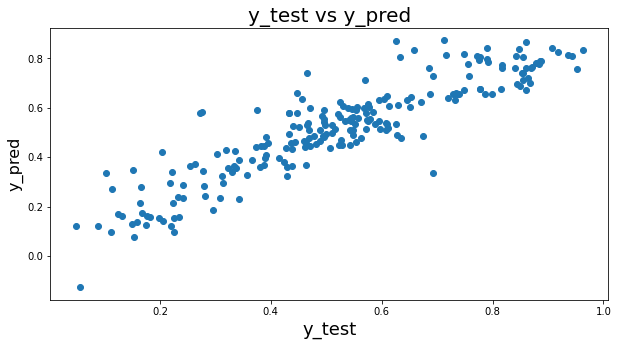

In [74]:
# Model Evaluation
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)

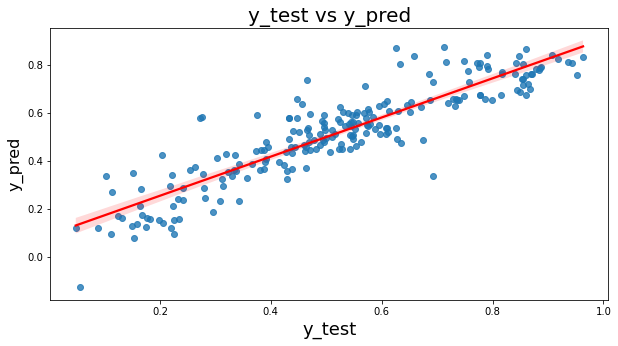

In [75]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=y_pred,fit_reg=True,line_kws={"color":"red"})
plt.title('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)
plt.show()

In [76]:
# Evaluate R square

r2_score(y_test,y_pred)

0.8092660294132241

In [77]:
X_test_1.shape

(220, 11)

In [78]:
# Calculate Adjusted R square

print(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-X.shape[1]-1)))

0.8001400021124214


We can see that the equation of our best fitted line is:

$ cnt = 0.1501 -0.0766 \times Spring + 0.0367 \times Summer + 0.0829 \times Winter -0.2989 \times Light Snow -0.0785 \times Mist + Cloudy -0.0523 \times July + 0.0812 \times September + 0.2326 \times yr -0.1003 \times holiday + 0.5029 \times temp $

Conclusion : We have built a decent model with 10 significant variables.

Train R^2=0.824 Train Adjusted R^2=0.82 Test R^2: 0.8092 Test Adjusted R^2:0.8001

temp has the highest coefficient value = 0.5029

there are also some variables with negative coefficients like light snow and mist+cloudy


The company now has significant predictors like summer and winter for season and septmenber for month where the demand is high.
The company also needs to focus on the predictors like light snow ,mist+cloudy where demand is less and plan their strategy
 